Primeira etapa: Limpeza de dados com pandas

# **1. Entendendo os dados**

---



O  [*default of credit card clients dataset*](https://www.kaggle.com/datasets/uciml/default-of-credit-card-clients-dataset) foi extaído do Kaggle.<br>


Nele é possível ter acesso a toda documentação.


## **1.1  Importando os pacotes e lendo os dados**

Bibliotecas

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from matplotlib.ticker import FuncFormatter
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score, roc_auc_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import LinearSVC
from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/Breno-G/AT1-N2/refs/heads/main/dataset/UCI_Credit_Card.csv')

### Variáreis


<ol>
  <li><strong>ID</strong>: Identificador único de cada cliente.</li>
  <li><strong>LIMIT_BAL</strong>: Valor total de crédito concedido (em dólares taiwaneses), incluindo limites pessoais e adicionais.</li>
  <li><strong>SEX</strong>: Sexo do cliente: 1 para masculino, 2 para feminino.</li>
  <li><strong>EDUCATION</strong>: Grau de escolaridade: 1 = pós-graduação, 2 = universidade, 3 = ensino médio, 4 = outros, 5 e 6 = desconhecido.</li>
  <li><strong>MARRIAGE</strong>: Estado civil: 1 = casado, 2 = solteiro, 3 = outros.</li>
  <li><strong>AGE</strong>: Idade do cliente (em anos).</li>
  <li><strong>PAY_0</strong>: Situação de pagamento em setembro de 2005: -1 = pagamento em dia, 1 = atraso de 1 mês, até 9 = 9 meses ou mais de atraso.</li>
  <li><strong>PAY_2</strong>: Situação de pagamento em agosto de 2005 (mesma escala de PAY_0).</li>
  <li><strong>PAY_3</strong>: Situação de pagamento em julho de 2005 (mesma escala).</li>
  <li><strong>PAY_4</strong>: Situação de pagamento em junho de 2005 (mesma escala).</li>
  <li><strong>PAY_5</strong>: Situação de pagamento em maio de 2005 (mesma escala).</li>
  <li><strong>PAY_6</strong>: Situação de pagamento em abril de 2005 (mesma escala).</li>
  <li><strong>BILL_AMT1</strong>: Valor da fatura em setembro de 2005 (em dólares taiwaneses).</li>
  <li><strong>BILL_AMT2</strong>: Valor da fatura em agosto de 2005.</li>
  <li><strong>BILL_AMT3</strong>: Valor da fatura em julho de 2005.</li>
  <li><strong>BILL_AMT4</strong>: Valor da fatura em junho de 2005.</li>
  <li><strong>BILL_AMT5</strong>: Valor da fatura em maio de 2005.</li>
  <li><strong>BILL_AMT6</strong>: Valor da fatura em abril de 2005.</li>
  <li><strong>PAY_AMT1</strong>: Valor do pagamento realizado em setembro de 2005.</li>
  <li><strong>PAY_AMT2</strong>: Valor do pagamento realizado em agosto de 2005.</li>
  <li><strong>PAY_AMT3</strong>: Valor do pagamento realizado em julho de 2005.</li>
  <li><strong>PAY_AMT4</strong>: Valor do pagamento realizado em junho de 2005.</li>
  <li><strong>PAY_AMT5</strong>: Valor do pagamento realizado em maio de 2005.</li>
  <li><strong>PAY_AMT6</strong>: Valor do pagamento realizado em abril de 2005.</li>
  <li><strong>default.payment.next.month</strong>: Indica inadimplência no mês seguinte: 1 = sim (houve inadimplência), 0 = não.</li>
</ol>

## 1.2 Renomeando variáveis


Duas colunas podem ter nomes melhores:

In [ ]:
df = df.rename(columns={'PAY_0' : 'PAY_1',
                        'default.payment.next.month' : 'DEF_NEXT_MONTH'})


## 1.3 Análise e limpeza de dados

O método .info() mostra que não será necessário fazer casting.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ID              30000 non-null  int64  
 1   LIMIT_BAL       30000 non-null  float64
 2   SEX             30000 non-null  int64  
 3   EDUCATION       30000 non-null  int64  
 4   MARRIAGE        30000 non-null  int64  
 5   AGE             30000 non-null  int64  
 6   PAY_1           30000 non-null  int64  
 7   PAY_2           30000 non-null  int64  
 8   PAY_3           30000 non-null  int64  
 9   PAY_4           30000 non-null  int64  
 10  PAY_5           30000 non-null  int64  
 11  PAY_6           30000 non-null  int64  
 12  BILL_AMT1       30000 non-null  float64
 13  BILL_AMT2       30000 non-null  float64
 14  BILL_AMT3       30000 non-null  float64
 15  BILL_AMT4       30000 non-null  float64
 16  BILL_AMT5       30000 non-null  float64
 17  BILL_AMT6       30000 non-null 

### **Veficar dados estranhos no dataframe:**


In [ ]:
for col in df.columns:
    print(f"Coluna: {col}")
    print(df[col].unique())
    print("-" * 30)

Coluna: ID
[    1     2     3 ... 29998 29999 30000]
------------------------------
Coluna: LIMIT_BAL
[  20000.  120000.   90000.   50000.  500000.  100000.  140000.  200000.
  260000.  630000.   70000.  250000.  320000.  360000.  180000.  130000.
  450000.   60000.  230000.  160000.  280000.   10000.   40000.  210000.
  150000.  380000.  310000.  400000.   80000.  290000.  340000.  300000.
   30000.  240000.  470000.  480000.  350000.  330000.  110000.  420000.
  170000.  370000.  270000.  220000.  190000.  510000.  460000.  440000.
  410000.  490000.  390000.  580000.  600000.  620000.  610000.  700000.
  670000.  680000.  430000.  550000.  540000. 1000000.  530000.  710000.
  560000.  520000.  750000.  640000.   16000.  570000.  590000.  660000.
  720000.  327680.  740000.  800000.  760000.  690000.  650000.  780000.
  730000.]
------------------------------
Coluna: SEX
[2 1]
------------------------------
Coluna: EDUCATION
[2 1 3 5 4 6 0]
------------------------------
Coluna: MARR

### Limpando dados inválidos

EDUCATION: 0 não existe na documentação e 5 e 6 são desconhecidos, subtituir para 4 (outros)

MARIAGE: 0 não existe, substituir para 3 (outros
)

In [ ]:
# Corrigir valores incorretos em 'EDUCATION'
df["EDUCATION"] = df["EDUCATION"].replace({0: 4, 5: 4, 6: 4})

# Corrigir valores incorretos em 'MARRIAGE'
df["MARRIAGE"] = df["MARRIAGE"].replace({0: 3})

#Verificar
for col in ['MARRIAGE', 'EDUCATION']:
    print(f"Coluna: {col}")
    print(df[col].unique())
    print("-" * 30)

Coluna: MARRIAGE
[1 2 3]
------------------------------
Coluna: EDUCATION
[2 1 3 4]
------------------------------


A coluna PAY_[n] contem numeros negativos, que sugere que o cliente pagou antecipadamente. Mas além de não estar documentado, pode atrapalhar o processo de aprendizado de máquina.

In [ ]:
#Corrigir valores negativos
pay_status_cols = ["PAY_1", "PAY_2", "PAY_3", "PAY_4", "PAY_5", "PAY_6"]
for col in pay_status_cols:
    df[col] = df[col].apply(lambda x: 0 if x < 0 else x)
#Verificar
for col in ["PAY_1", "PAY_2", "PAY_3", "PAY_4", "PAY_5", "PAY_6"]:
    print(f"Coluna: {col}")
    print(df[col].unique())
    print("-" * 30)


Coluna: PAY_1
[2 0 1 3 4 8 7 5 6]
------------------------------
Coluna: PAY_2
[2 0 3 5 7 4 1 6 8]
------------------------------
Coluna: PAY_3
[0 2 3 4 6 7 1 5 8]
------------------------------
Coluna: PAY_4
[0 2 3 4 5 7 6 1 8]
------------------------------
Coluna: PAY_5
[0 2 3 5 4 7 8 6]
------------------------------
Coluna: PAY_6
[0 2 3 6 4 7 8 5]
------------------------------


O dados em PAY_AMT[n] e BILL_AMT[n] precisam ser normalizados para maior precisão nas próximas etapas.

In [ ]:
df[['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']].describe()

,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000
mean,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567
std,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775
min,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000
25%,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000
50%,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000
75%,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000
max,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000


In [ ]:
#Normalização dos dados
scaler = StandardScaler()
bill_amt_cols = [f"BILL_AMT{i}" for i in range(1, 7)]
pay_amt_cols = [f"PAY_AMT{i}" for i in range(1, 7)]
df[bill_amt_cols + pay_amt_cols] = scaler.fit_transform(df[bill_amt_cols + pay_amt_cols])




In [ ]:
df[bill_amt_cols + pay_amt_cols].describe()


,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04
mean,-1.231607e-17,-3.789561e-17,6.252776e-17,5.873820e-17,-2.368476e-17,1.136868e-17,-4.736952e-18,1.373716e-17,2.084259e-17,1.800042e-17,-1.965835e-17,-1.788199e-17
std,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00
min,-2.944312e+00,-1.671375e+00,-2.945672e+00,-3.315048e+00,-2.000874e+00,-6.355247e+00,-3.419416e-01,-2.569895e-01,-2.968013e-01,-3.080626e-01,-3.141361e-01,-2.933821e-01
25%,-6.473120e-01,-6.490466e-01,-6.394814e-01,-6.363293e-01,-6.340600e-01,-6.316338e-01,-2.815661e-01,-2.208358e-01,-2.746506e-01,-2.891680e-01,-2.976091e-01,-2.867584e-01
50%,-3.916884e-01,-3.931159e-01,-3.882529e-01,-3.763451e-01,-3.652683e-01,-3.660725e-01,-2.151530e-01,-1.697952e-01,-1.945673e-01,-2.123132e-01,-2.159561e-01,-2.090042e-01
75%,2.154919e-01,2.083271e-01,1.896457e-01,1.747667e-01,1.624955e-01,1.733997e-01,-3.970176e-02,-3.998021e-02,-4.093230e-02,-5.188511e-02,-5.026084e-02,-6.837436e-02
max,1.240296e+01,1.313360e+01,2.331820e+01,1.318669e+01,1.458743e+01,1.549528e+01,5.239921e+01,7.284299e+01,5.059528e+01,3.933218e+01,2.760363e+01,2.944510e+01


In [ ]:
# Resultado final limpo
df_cleaned = df.copy()


# 2 Análise Exploratória (EDA)


##2.1 Estatísticas descritivas

Primeiras 5 linhas da tabela

In [ ]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEF_NEXT_MONTH
0,1,20000.0,2,2,1,24,2,2,0,0,...,-0.672497,-0.663059,-0.652724,-0.341942,-0.227086,-0.296801,-0.308063,-0.314136,-0.293382,1
1,2,120000.0,2,2,2,26,0,2,0,0,...,-0.621636,-0.606229,-0.597966,-0.341942,-0.213588,-0.240005,-0.244230,-0.314136,-0.180878,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,-0.449730,-0.417188,-0.391630,-0.250292,-0.191887,-0.240005,-0.244230,-0.248683,-0.012122,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,-0.232373,-0.186729,-0.156579,-0.221191,-0.169361,-0.228645,-0.237846,-0.244166,-0.237130,0
4,5,50000.0,1,2,1,57,0,0,0,0,...,-0.346997,-0.348137,-0.331482,-0.221191,1.335034,0.271165,0.266434,-0.269039,-0.255187,0


Contagem de variáveis, Média, Desvio padrão, Mínimo e Máximo

In [ ]:
df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEF_NEXT_MONTH
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,30000.000000
mean,15000.500000,167484.322667,1.603733,1.842267,1.557267,35.485500,0.356767,0.320033,0.304067,0.258767,...,5.873820e-17,-2.368476e-17,1.136868e-17,-4.736952e-18,1.373716e-17,2.084259e-17,1.800042e-17,-1.965835e-17,-1.788199e-17,0.221200
std,8660.398374,129747.661567,0.489129,0.744494,0.521405,9.217904,0.760594,0.801727,0.790589,0.761113,...,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,0.415062
min,1.000000,10000.000000,1.000000,1.000000,1.000000,21.000000,0.000000,0.000000,0.000000,0.000000,...,-3.315048e+00,-2.000874e+00,-6.355247e+00,-3.419416e-01,-2.569895e-01,-2.968013e-01,-3.080626e-01,-3.141361e-01,-2.933821e-01,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,0.000000,0.000000,0.000000,0.000000,...,-6.363293e-01,-6.340600e-01,-6.316338e-01,-2.815661e-01,-2.208358e-01,-2.746506e-01,-2.891680e-01,-2.976091e-01,-2.867584e-01,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,-3.763451e-01,-3.652683e-01,-3.660725e-01,-2.151530e-01,-1.697952e-01,-1.945673e-01,-2.123132e-01,-2.159561e-01,-2.090042e-01,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,1.747667e-01,1.624955e-01,1.733997e-01,-3.970176e-02,-3.998021e-02,-4.093230e-02,-5.188511e-02,-5.026084e-02,-6.837436e-02,0.000000
max,30000.000000,1000000.000000,2.000000,4.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,1.318669e+01,1.458743e+01,1.549528e+01,5.239921e+01,7.284299e+01,5.059528e+01,3.933218e+01,2.760363e+01,2.944510e+01,1.000000


Valores nulos em cada coluna

In [ ]:
df.isnull().sum()

,0
ID,0
LIMIT_BAL,0
SEX,0
EDUCATION,0
MARRIAGE,0
AGE,0
PAY_1,0
PAY_2,0
PAY_3,0
PAY_4,0


Quantidade de variaveis unicas em cada coluna

In [ ]:
df.nunique()

,0
ID,30000
LIMIT_BAL,81
SEX,2
EDUCATION,4
MARRIAGE,3
AGE,56
PAY_1,9
PAY_2,9
PAY_3,9
PAY_4,9


##2.2 Vizualização por gráficos


**Histogramas**

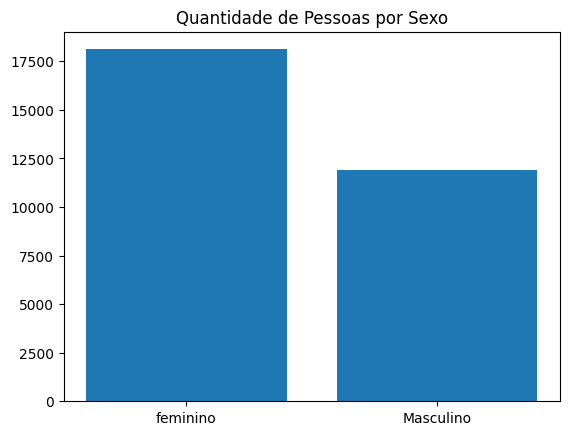

In [ ]:
sex = df['SEX'].replace({1:'Masculino', 2:'feminino'}).value_counts().reset_index()
plt.bar(sex['SEX'], sex['count'])
plt.title('Quantidade de Pessoas por Sexo')
plt.show()



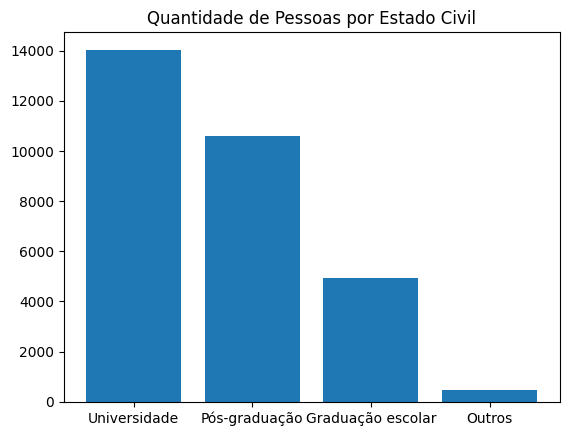

In [ ]:
education = df['EDUCATION'].replace({
    1: 'Pós-graduação',
    2: 'Universidade',
    3: 'Graduação escolar',
    4: 'Outros',}).value_counts().reset_index()
plt.bar(education['EDUCATION'], education['count'])
plt.title('Quantidade de Pessoas por Estado Civil')
plt.show()

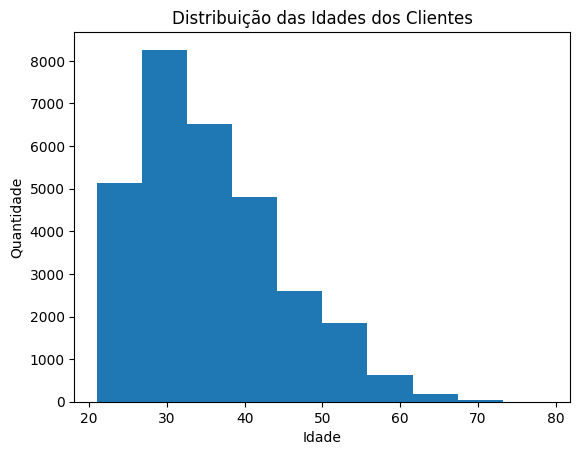

In [ ]:
plt.hist(df_cleaned['AGE'], bins=10)
plt.title('Distribuição das Idades dos Clientes')
plt.xlabel('Idade')
plt.ylabel('Quantidade')
plt.show()


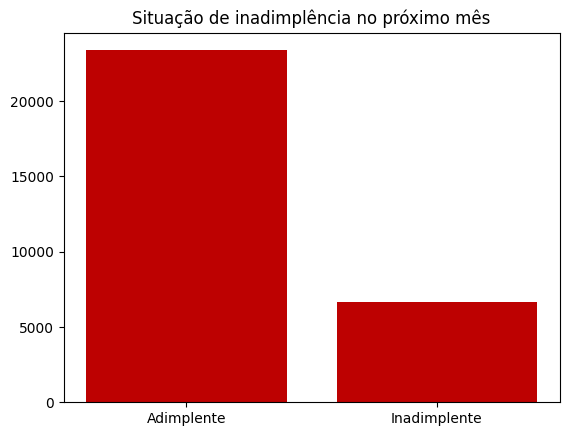

In [ ]:
default_next_month = df['DEF_NEXT_MONTH'].replace(
    {0:'Adimplente', 1:'Inadimplente'}
).value_counts().reset_index()
plt.bar(default_next_month['DEF_NEXT_MONTH'], default_next_month['count'], color='#BD0101')
plt.title('Situação de inadimplência no próximo mês')
plt.show()




> Com os gráficos é possível observar algumas informações importantes. <br>
Em especial a **"Situação de inadimplência no próximo mês"**, pois nela contem o alvo de para o aprendizado de máquina do projeto.


  





**Boxplot**

<Figure size 800x500 with 0 Axes>

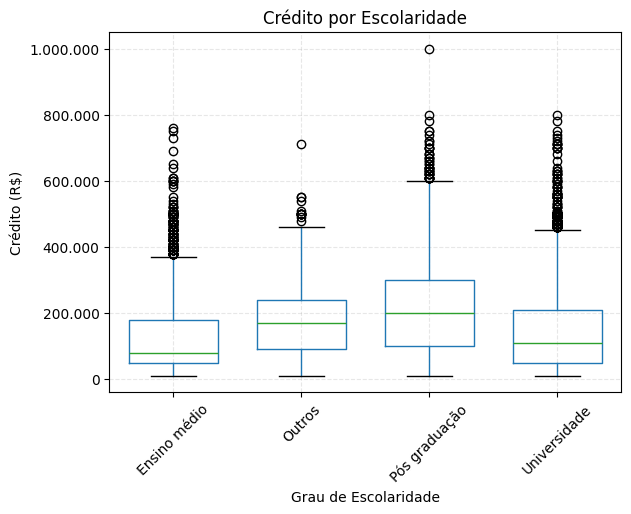

In [ ]:
def milhar(x, pos):
    return f'{int(x):,}'.replace(',', '.')

df['EDUCATION_LABEL'] = df_cleaned['EDUCATION'].replace({
    1: 'Pós graduação',
    2: 'Universidade',
    3: 'Ensino médio',
    4: 'Outros'
})

plt.figure(figsize=(8, 5))
df.boxplot(column='LIMIT_BAL', by='EDUCATION_LABEL', widths=0.7)
plt.title('Crédito por Escolaridade')
plt.suptitle('')
plt.grid(True, linestyle='--', alpha=0.3)
plt.xlabel('Grau de Escolaridade')
plt.ylabel('Crédito (R$)')
plt.xticks(rotation=45)

plt.gca().yaxis.set_major_formatter(FuncFormatter(milhar))

plt.show()

<Figure size 1000x500 with 0 Axes>

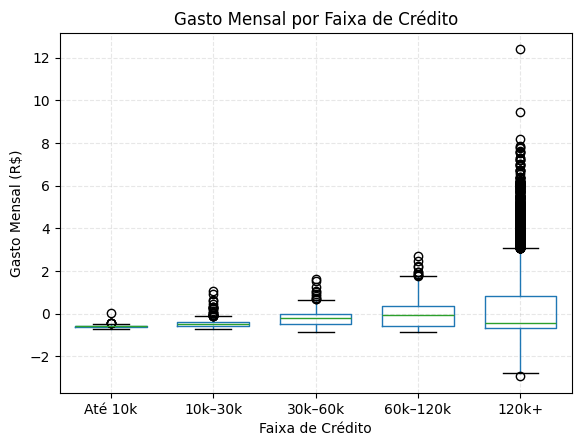

In [ ]:
# Faixas de limite
df['FAIXA_CREDITO'] = pd.cut(df['LIMIT_BAL'], bins=[0, 10000, 30000, 60000, 120000, 1000000],
                             labels=['Até 10k', '10k–30k', '30k–60k', '60k–120k', '120k+'])

plt.figure(figsize=(10, 5))
df.boxplot(column='BILL_AMT1', by='FAIXA_CREDITO', widths=0.7)
plt.title('Gasto Mensal por Faixa de Crédito')
plt.suptitle('')
plt.xlabel('Faixa de Crédito')
plt.ylabel('Gasto Mensal (R$)')
plt.grid(True, linestyle='--', alpha=0.3)
plt.show()

##2.3 Correlações

In [ ]:
correlacao = df_cleaned[["PAY_1", "PAY_2", "PAY_3", "PAY_4", "PAY_5", "PAY_6"]].corr()
print("Matriz de Correlação: \n",correlacao)

Matriz de Correlação: 
           PAY_1     PAY_2     PAY_3     PAY_4     PAY_5     PAY_6
PAY_1  1.000000  0.698389  0.516970  0.460224  0.424473  0.373805
PAY_2  0.698389  1.000000  0.663529  0.512773  0.462717  0.407086
PAY_3  0.516970  0.663529  1.000000  0.678931  0.551430  0.492827
PAY_4  0.460224  0.512773  0.678931  1.000000  0.745419  0.602875
PAY_5  0.424473  0.462717  0.551430  0.745419  1.000000  0.740357
PAY_6  0.373805  0.407086  0.492827  0.602875  0.740357  1.000000


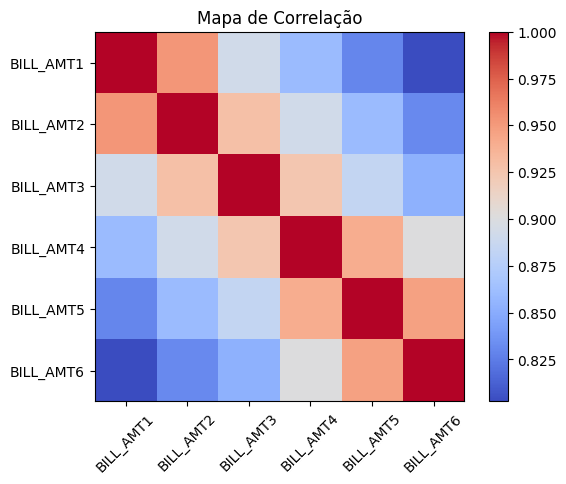

In [ ]:
correlacaoB = df[["BILL_AMT1", "BILL_AMT2", "BILL_AMT3", "BILL_AMT4", "BILL_AMT5", "BILL_AMT6"]].corr()

plt.imshow(correlacaoB, cmap='coolwarm', interpolation='none')
plt.colorbar()
plt.xticks(range(len(correlacaoB)), correlacaoB.columns, rotation=45)
plt.yticks(range(len(correlacaoB)), correlacaoB.columns)
plt.title('Mapa de Correlação')
plt.show()

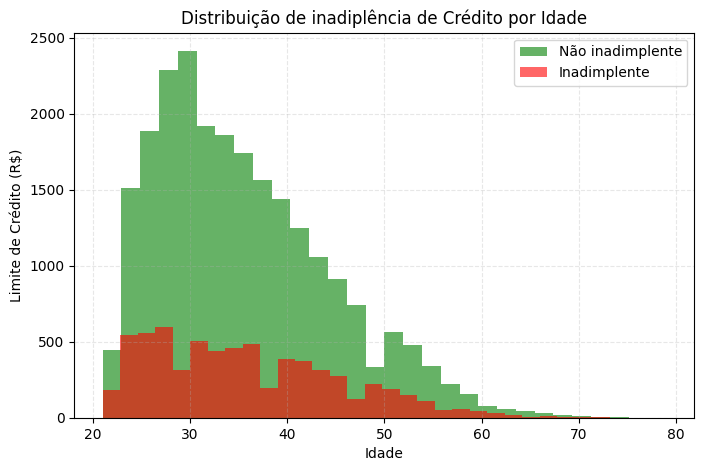

In [ ]:
plt.figure(figsize=(8, 5))
plt.hist(df[df['DEF_NEXT_MONTH'] == 0]['AGE'], bins=30, alpha=0.6, label='Não inadimplente', color='green')
plt.hist(df[df['DEF_NEXT_MONTH'] == 1]['AGE'], bins=30, alpha=0.6, label='Inadimplente', color='red')
plt.title('Distribuição de inadiplência de Crédito por Idade')
plt.ylabel('Limite de Crédito (R$)')
plt.xlabel('Idade')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.3)
plt.show()

#3 Pré-processamento

Corrigir outlier na idade

In [ ]:
df['AGE'] = df['AGE'].apply(lambda x: min(x, 90))

Definir colunas

In [ ]:
colunas_numericas = [
    'LIMIT_BAL', 'AGE',
    'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6',
    'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
    'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'
]

colunas_categoricas = ['SEX', 'EDUCATION', 'MARRIAGE']
coluna_alvo = 'DEF_NEXT_MONTH'

Criar pipeline

In [ ]:
pipeline_numerico = Pipeline([
    ('imputador', SimpleImputer(strategy='mean')),
    ('escalador', MinMaxScaler())
])
pipeline_categorico = Pipeline([
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

Combinar os pipelines

In [ ]:
preprocessador = ColumnTransformer(transformers=[
    ('num', pipeline_numerico, colunas_numericas),
    ('cat', pipeline_categorico, colunas_categoricas)
])

Separar X (variáveis) e y (alvo)

In [ ]:
X = df[colunas_numericas + colunas_categoricas]
y = df[coluna_alvo]

Aplicar o pré-processamento

In [ ]:
X_preprocessado = preprocessador.fit_transform(X)

Obter os nomes das colunas finais

In [ ]:
nomes_numericos = colunas_numericas
nomes_categoricos = preprocessador.named_transformers_['cat']['onehot'].get_feature_names_out(colunas_categoricas)
nomes_finais = list(nomes_numericos) + list(nomes_categoricos)

Criar DataFrame processado

In [ ]:
df_processado = pd.DataFrame(X_preprocessado, columns=nomes_finais)

# 4 Treinamento

Esta etapa contempla as etapas de Modelagem e Avaliação dos algoritmos de previsao

In [ ]:
n_clientes = y.count()
n_inadimplentes = y.sum()
inadimplentes_percent = (n_inadimplentes / n_clientes) * 100

print(f"Número de clientes: {n_clientes}")
print(f"Número de inadimplentes: {n_inadimplentes}")
print(f"Porcentagem de inadimplentes: {inadimplentes_percent:.2f} %")

Número de clientes: 30000
Número de inadimplentes: 6636
Porcentagem de inadimplentes: 22.12 %


In [ ]:
#função de avaliação de desempenho
def validation(y_test, y_pred):
  print("Acurácia: ", "%.2f" % (accuracy_score(y_test, y_pred) * 100), "%")
  print("Precisão: ", "%.2f" % (precision_score(y_test, y_pred) * 100), "%")
  print("Recall: ", "%.2f" % (recall_score(y_test, y_pred) * 100), "%")
  print("F1 Score: ", "%.2f" % (f1_score(y_test, y_pred) * 100), "%")
  print("ROC AUC Score:", "%.2f" % (roc_auc_score(y_test, y_pred) * 100), "%")
  print("Matriz de confusão: \n", confusion_matrix(y_test, y_pred))

In [ ]:
# Divisão em treino e teste com estratificação
X_train, X_test, y_train, y_test = train_test_split(df_processado, y, test_size=0.3, random_state=42, stratify=y)

SEED = 301
X_train, X_test, y_train, y_test = train_test_split(df_processado, y, test_size=0.3, stratify=y, random_state=SEED)
print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(X_train), len(X_test)))

Treinaremos com 21000 elementos e testaremos com 9000 elementos


##4.1 Classificação e otimização

###4.1.1 Dummy Classifier

In [ ]:
dummy_stratified = DummyClassifier(strategy="stratified", random_state=SEED)
dummy_stratified.fit(X_train, y_train)

y_pred_dummy = dummy_stratified.predict(X_test)

validation(y_test, y_pred_dummy)

Acurácia:  65.80 %
Precisão:  22.14 %
Recall:  21.70 %
F1 Score:  21.92 %
ROC AUC Score: 50.01 %
Matriz de confusão: 
 [[5490 1519]
 [1559  432]]


###4.1.2 Decision Tree

In [ ]:
# Criar e treinar o modelo
tree_model = DecisionTreeClassifier(max_depth=5, random_state=SEED)
tree_model.fit(X_train, y_train)

# Previsões
y_pred = tree_model.predict(X_test)

# Avaliação
validation(y_test, y_pred)

Acurácia:  81.98 %
Precisão:  69.08 %
Recall:  33.55 %
F1 Score:  45.17 %
ROC AUC Score: 64.64 %
Matriz de confusão: 
 [[6710  299]
 [1323  668]]


In [ ]:
# Hiperparâmetros que queremos testar
param_grid = {
    'max_depth': [3, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# GridSearch com validação cruzada
grid_search = GridSearchCV(
    estimator=DecisionTreeClassifier(random_state=SEED),
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

# Treinar
grid_search.fit(X_train, y_train)

# Melhor modelo
best_tree = grid_search.best_estimator_

# Avaliação
best_pred = best_tree.predict(X_test)
validation(y_test, best_pred)
print("Melhor Acurácia:", accuracy_score(y_test, best_pred))
print("Melhores parâmetros:", grid_search.best_params_)


Acurácia:  82.06 %
Precisão:  68.50 %
Recall:  34.96 %
F1 Score:  46.29 %
ROC AUC Score: 65.20 %
Matriz de confusão: 
 [[6689  320]
 [1295  696]]
Melhor Acurácia: 0.8205555555555556
Melhores parâmetros: {'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}


###4.1.3 RandomForestClassifier

In [ ]:
# Criar o modelo base com parâmetros iniciais
rf_model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=SEED)
rf_model.fit(X_train, y_train)

# Fazer previsão básica (opcional, antes do ajuste)
y_pred_rf = rf_model.predict(X_test)
validation(y_test, y_pred_rf)

Acurácia:  81.90 %
Precisão:  68.70 %
Recall:  33.40 %
F1 Score:  44.95 %
ROC AUC Score: 64.54 %
Matriz de confusão: 
 [[6706  303]
 [1326  665]]


In [ ]:
# Definir os hiperparâmetros a testar
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 10],
    'min_samples_split': [2, 5]
}

# Criar o objeto GridSearchCV
grid_search = GridSearchCV(
    estimator=rf_model,  # usa o modelo criado antes
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

# Treinar com validação cruzada
grid_search.fit(X_train, y_train)

# Melhor modelo encontrado
best_rf = grid_search.best_estimator_

# Avaliar no conjunto de teste
best_pred = best_rf.predict(X_test)
validation(y_test, best_pred)


Acurácia:  82.07 %
Precisão:  69.99 %
Recall:  33.15 %
F1 Score:  44.99 %
ROC AUC Score: 64.56 %
Matriz de confusão: 
 [[6726  283]
 [1331  660]]
